<a href="https://colab.research.google.com/github/goswamiaman172/Internship/blob/main/Medical_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Medical Cost Personal Insurance Project
Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated.

Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance


Predict : Can you accurately predict insurance costs?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [145]:
dir_path='/content/drive/MyDrive/Project Internship Flip robo/Data/medical_cost_insurance.csv'

In [146]:
mdi = pd.read_csv(dir_path)

In [113]:
mdi

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [61]:
mdi.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [62]:
mdi.shape

(1338, 7)

In [63]:
mdi.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [64]:
mdi.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [65]:
mdi.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [66]:
mdi.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [67]:
mdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [68]:
# duplicate
len(mdi[mdi.duplicated()])

1

In [69]:
# unique values
mdi.apply(lambda x: len(x.unique()))

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [147]:
df= mdi

In [71]:
# checking for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [72]:
def get_count_plot(x):
  x=x
  y='charges'
  plt.figure(figsize=(15,5))
  sns.barplot(x=x,y=y,data=df)
  plt.title(x+' vs {}'.format(y),fontsize=20)
  plt.xlabel(x,fontsize=15)
  plt.ylabel(y,fontsize=15)

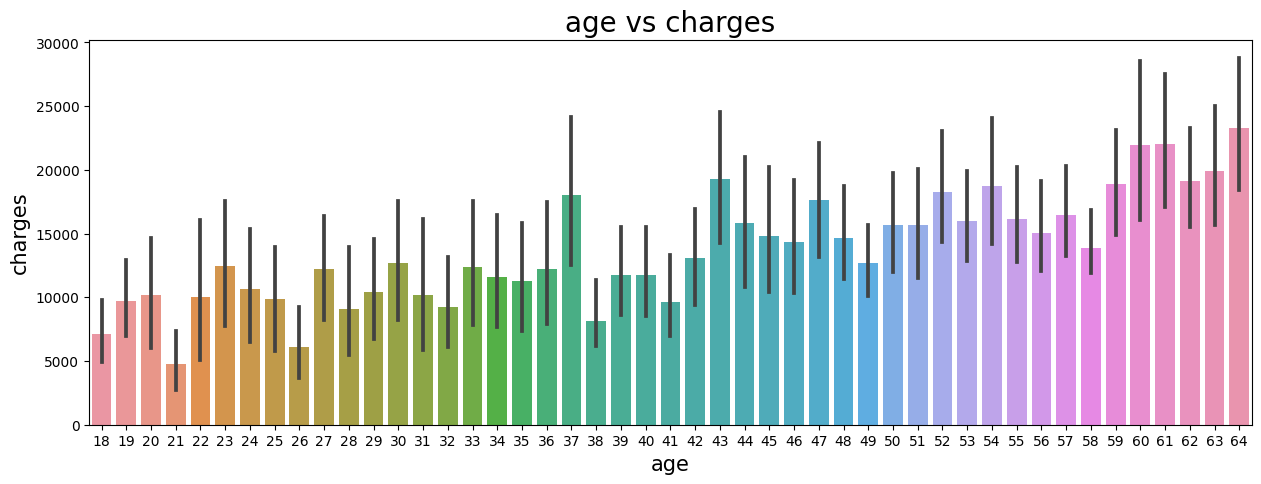

In [73]:
get_count_plot('age')

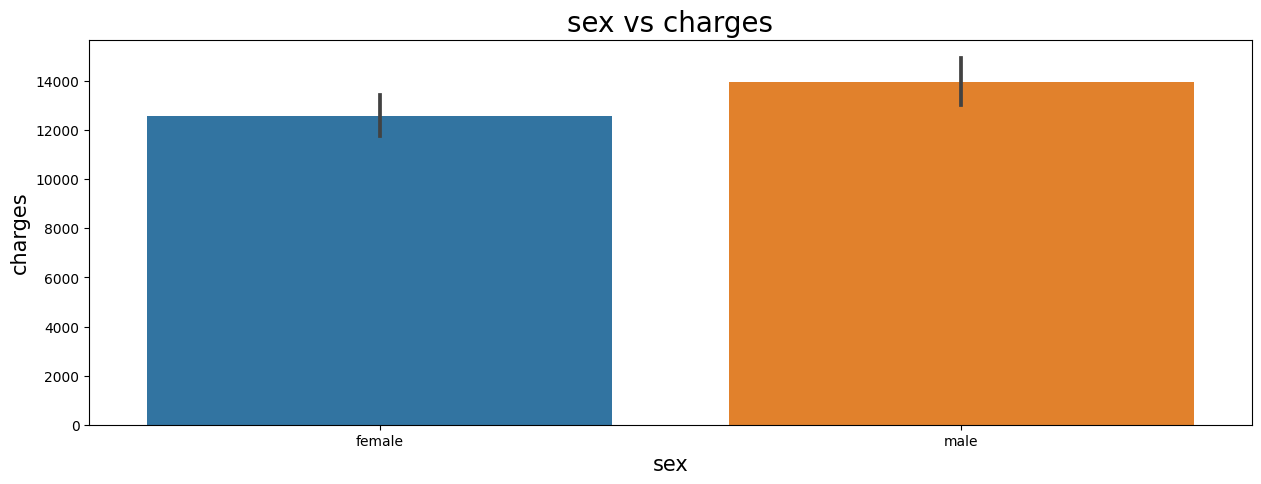

In [74]:
get_count_plot('sex')

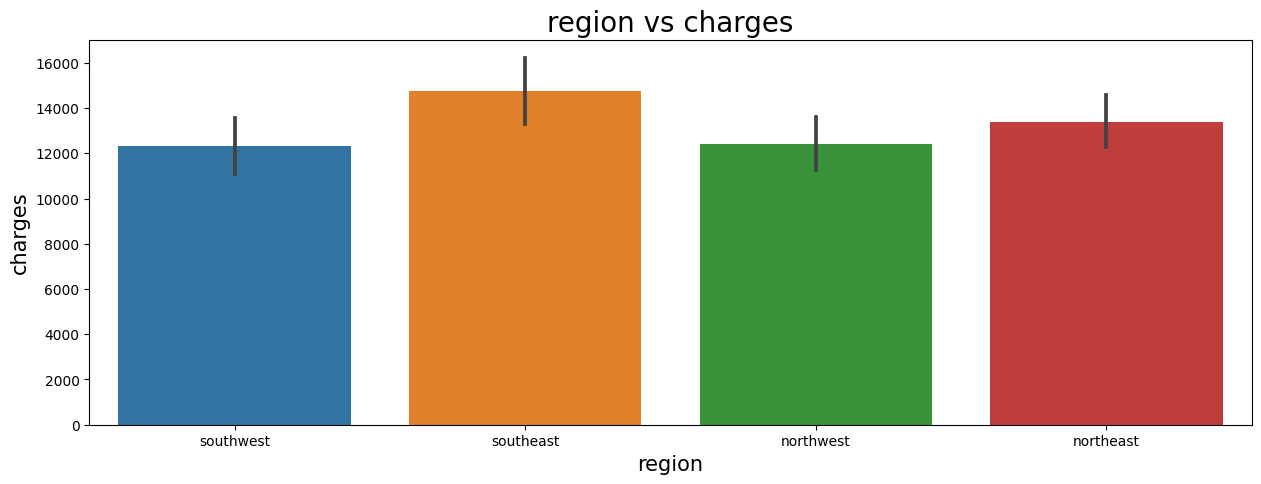

In [75]:
get_count_plot('region')

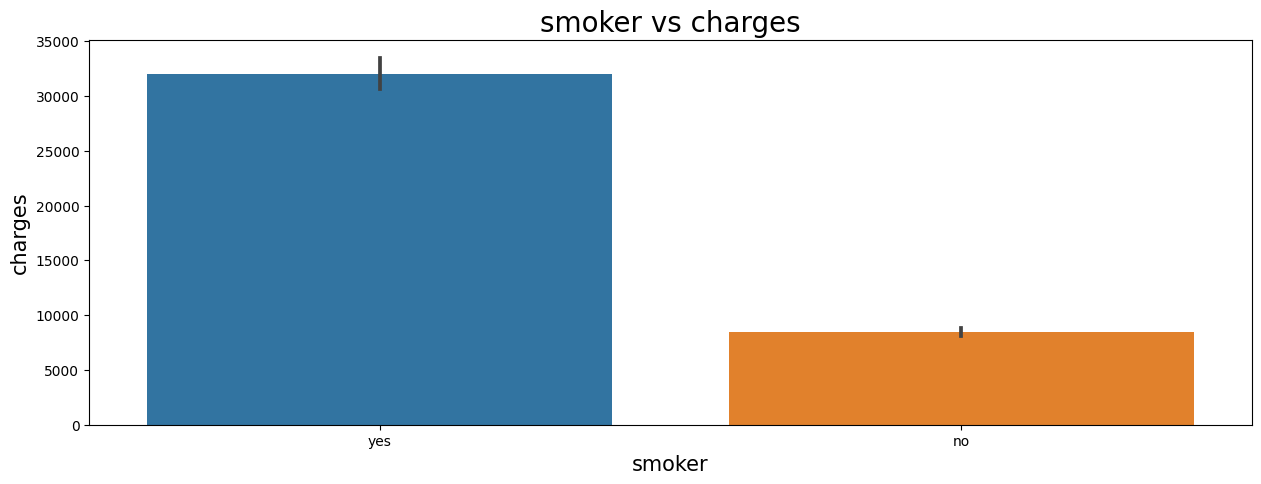

In [76]:
get_count_plot('smoker')

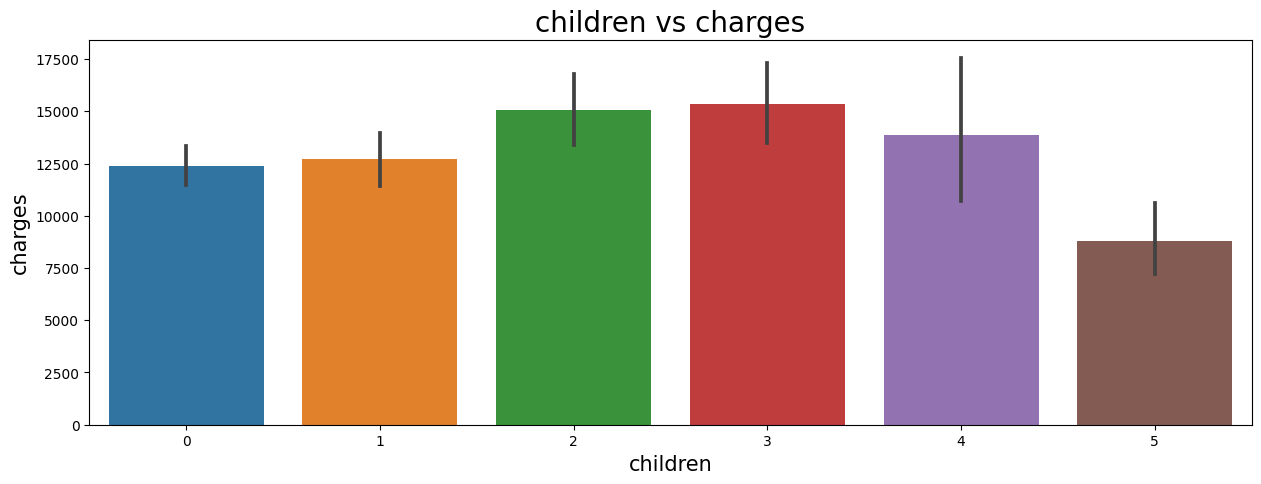

In [77]:
get_count_plot('children')

<ipython-input-78-0e7c0faad6c4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('region').sum()['charges'].plot.pie()


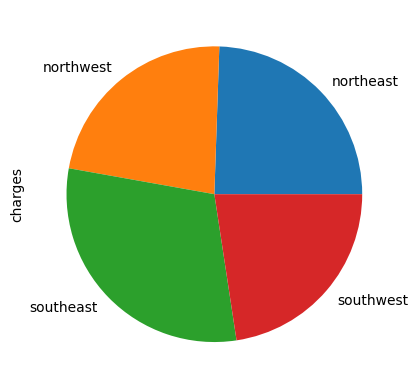

In [78]:
df.groupby('region').sum()['charges'].plot.pie()
plt.show()

<ipython-input-79-ead573e3474b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a=pd.DataFrame(df.groupby('age').sum()['charges'].sort_values(ascending=True))


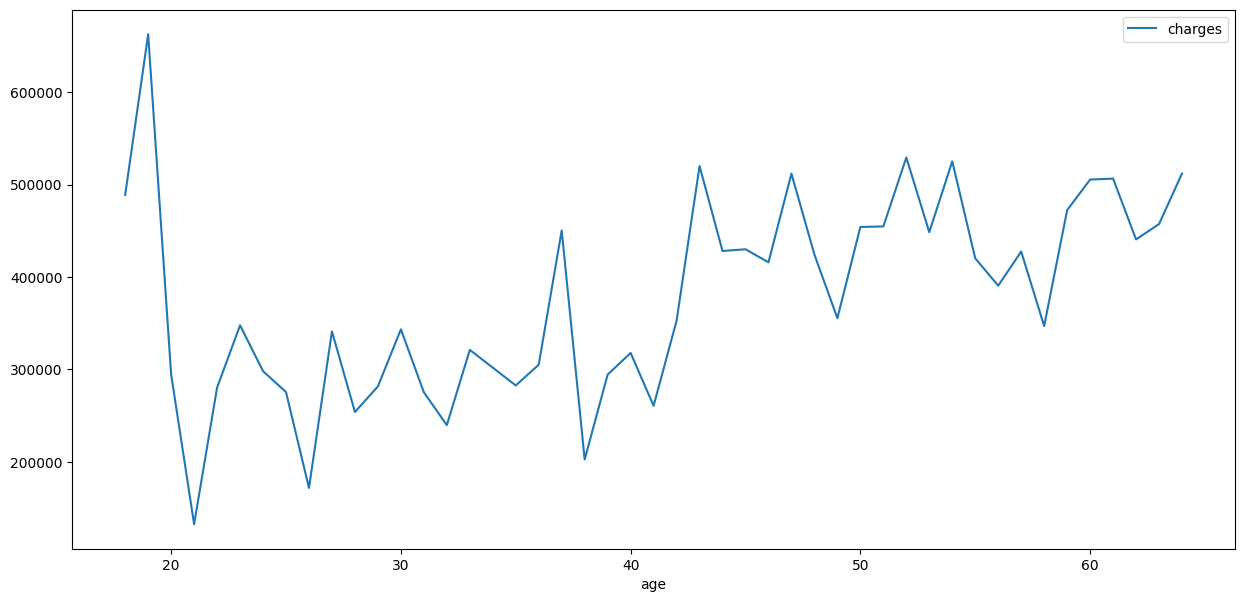

In [79]:
a=pd.DataFrame(df.groupby('age').sum()['charges'].sort_values(ascending=True))
a=a.sort_values('age',ascending=True)
a.plot(figsize = (15,7))
plt.show()

<ipython-input-80-d6b2ad2da8d2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('sex').sum()['charges'].plot.pie(radius=1.5)


<Axes: ylabel='charges'>

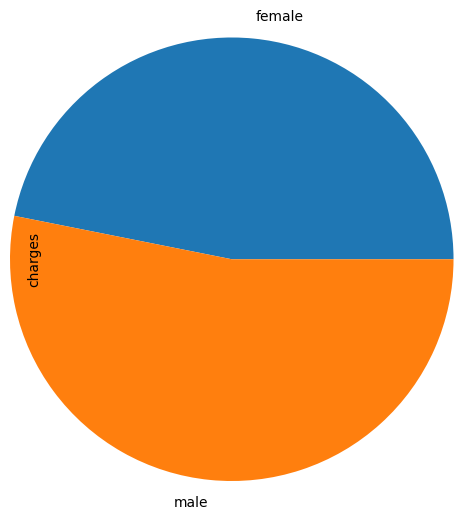

In [80]:
df.groupby('sex').sum()['charges'].plot.pie(radius=1.5)

<ipython-input-81-299f2935683d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('age').sum()['charges'].plot.pie(radius=1.5)


<Axes: ylabel='charges'>

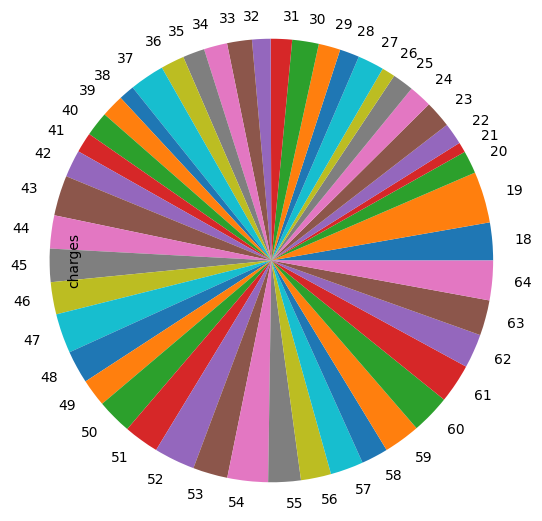

In [81]:
df.groupby('age').sum()['charges'].plot.pie(radius=1.5)

<ipython-input-82-b9dbbfe1c7d7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('children').sum()['charges'].plot.pie(radius=1.5)


<Axes: ylabel='charges'>

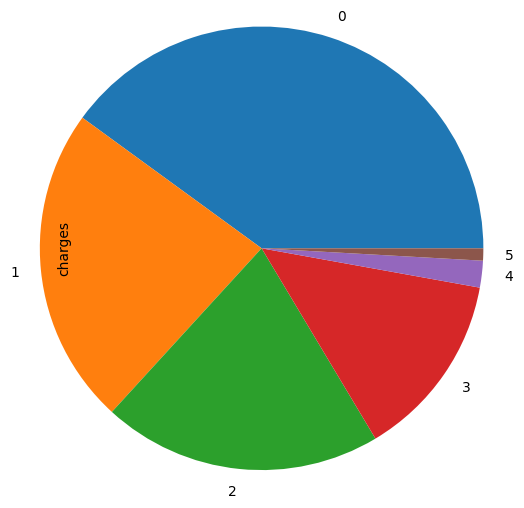

In [82]:
df.groupby('children').sum()['charges'].plot.pie(radius=1.5)

<ipython-input-83-37b52016a105>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('smoker').sum()['charges'].plot.pie(radius=1.5)


<Axes: ylabel='charges'>

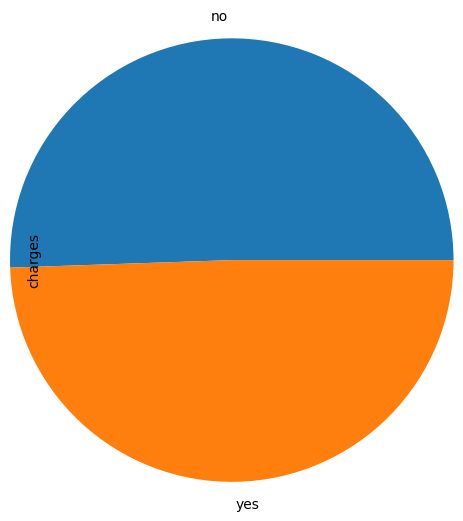

In [83]:
df.groupby('smoker').sum()['charges'].plot.pie(radius=1.5)

<ipython-input-84-a48753d2cfd3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('region').sum()['charges'].plot.pie(radius=1.5)


<Axes: ylabel='charges'>

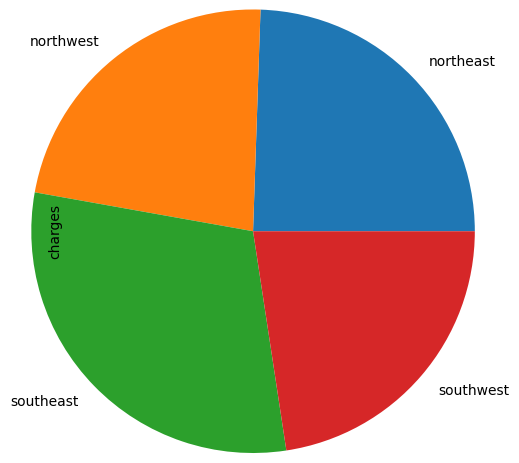

In [84]:
df.groupby('region').sum()['charges'].plot.pie(radius=1.5)

<Axes: xlabel='sex', ylabel='charges'>

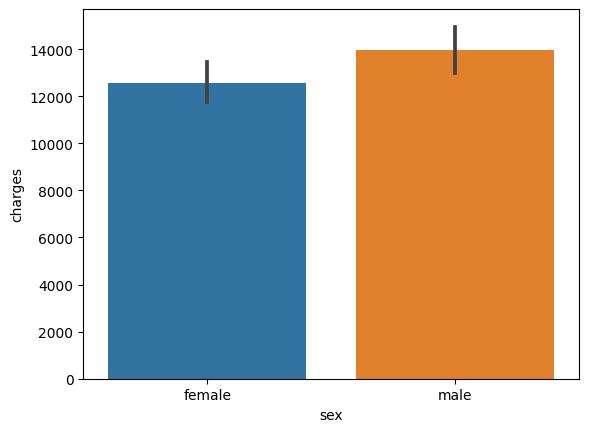

In [85]:
sns.barplot(x='sex',y='charges',data=df)

<ipython-input-86-cb14c4135623>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('age').mean()['charges'].plot()


<Axes: xlabel='age'>

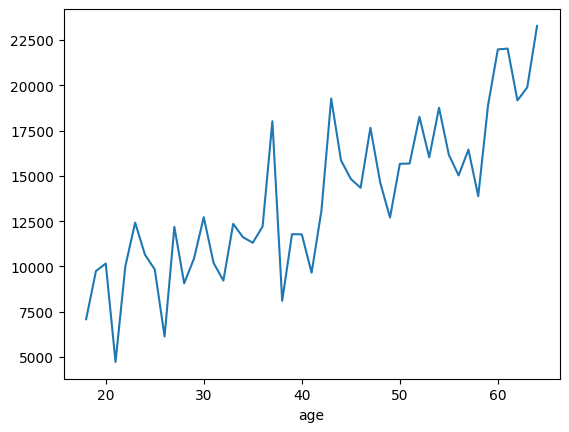

In [86]:
df.groupby('age').mean()['charges'].plot()

<ipython-input-87-8292d5481886>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('bmi').mean()['charges'].plot()


<Axes: xlabel='bmi'>

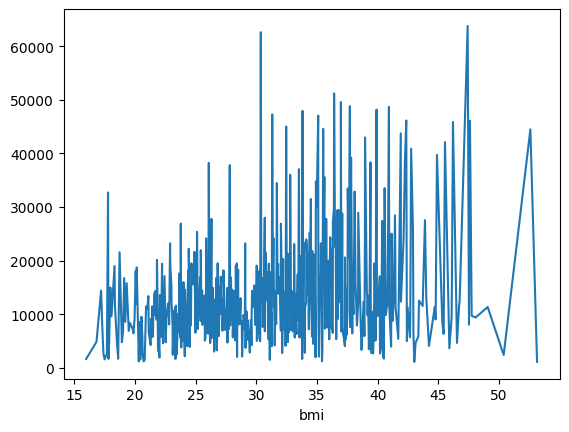

In [87]:
df.groupby('bmi').mean()['charges'].plot()

<ipython-input-88-fb6a98ddfaba>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('children').mean()['charges'].plot()


<Axes: xlabel='children'>

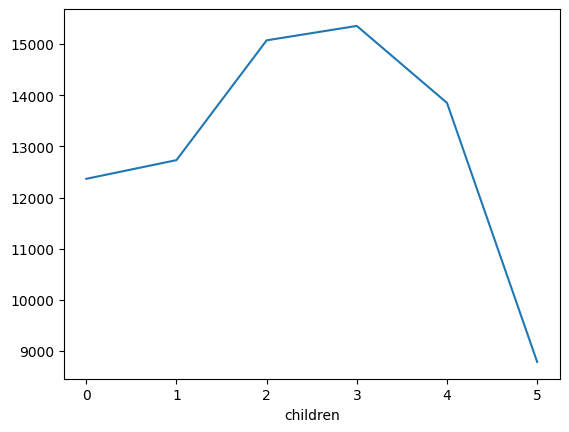

In [88]:
df.groupby('children').mean()['charges'].plot()

<ipython-input-89-2d596f9f3d90>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('region').mean()['charges'].plot()


<Axes: xlabel='region'>

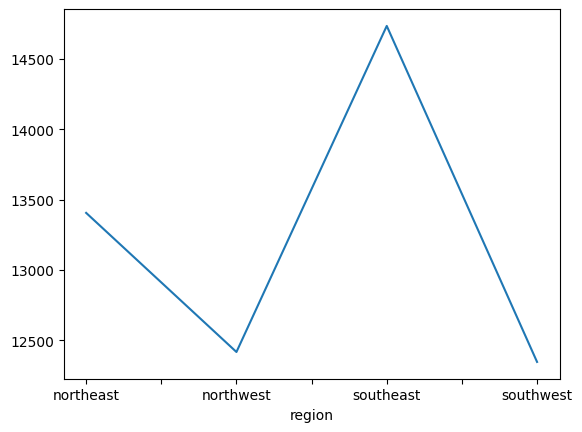

In [89]:
df.groupby('region').mean()['charges'].plot()

In [90]:
def get_plot(x,hue):
  x=x
  hue=hue
  y='charges'
  plt.figure(figsize=(17,5))
  sns.pointplot(x=x,y=y,hue=hue,data=df)
  plt.xlabel(x,fontsize=(15))
  plt.ylabel(y,fontsize=(15))
  plt.title(y+' '+'during different {}'.format(hue),fontsize=(20))

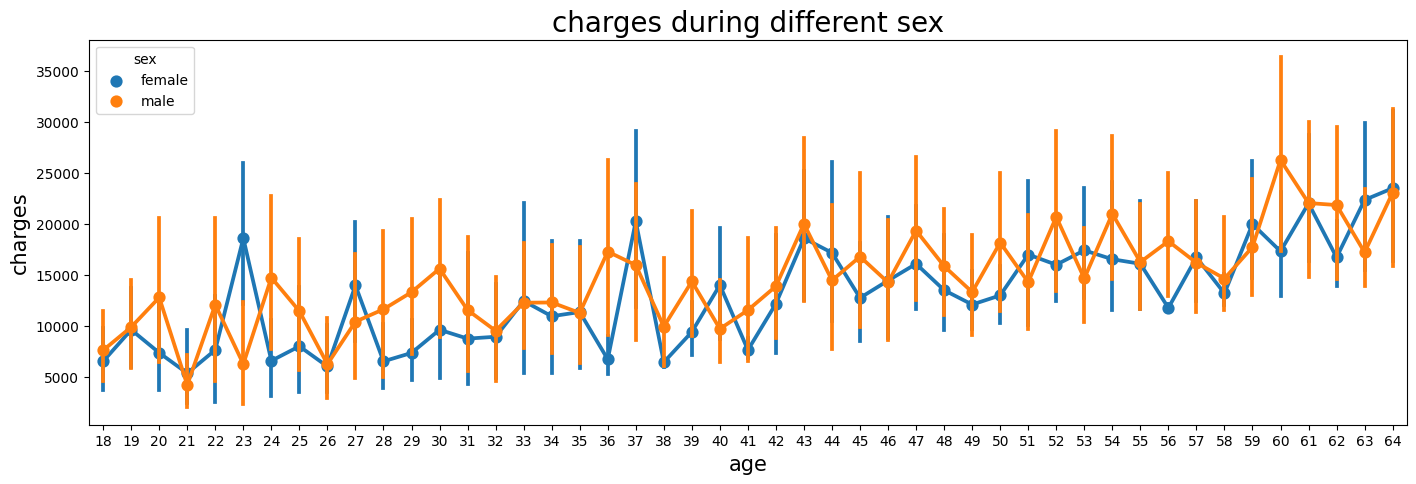

In [91]:
get_plot('age','sex')

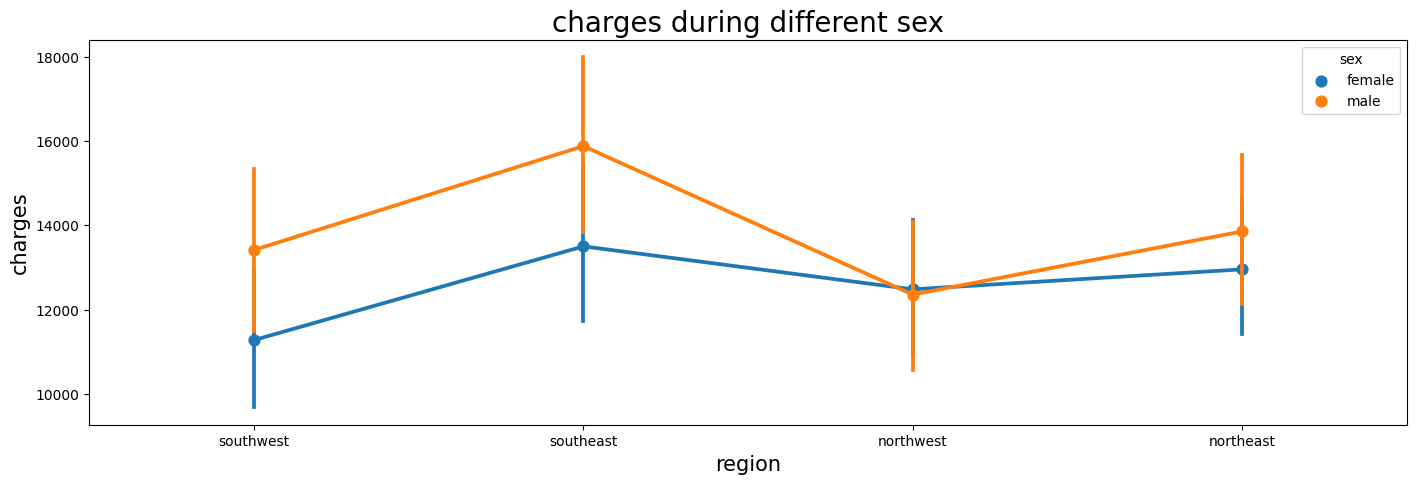

In [92]:
get_plot('region','sex')

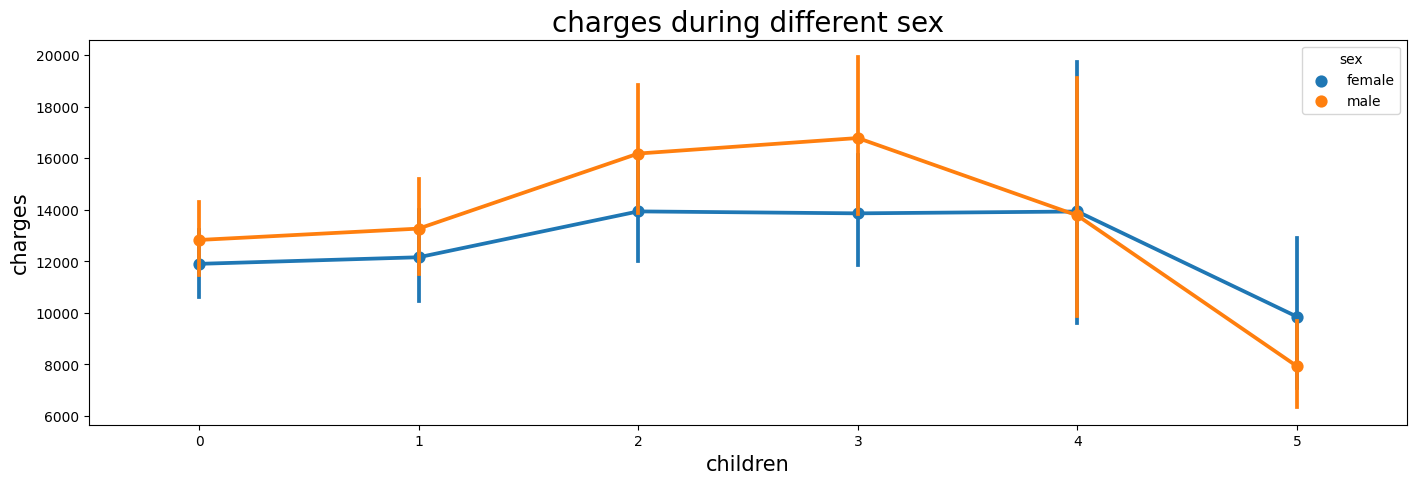

In [93]:
get_plot('children','sex')

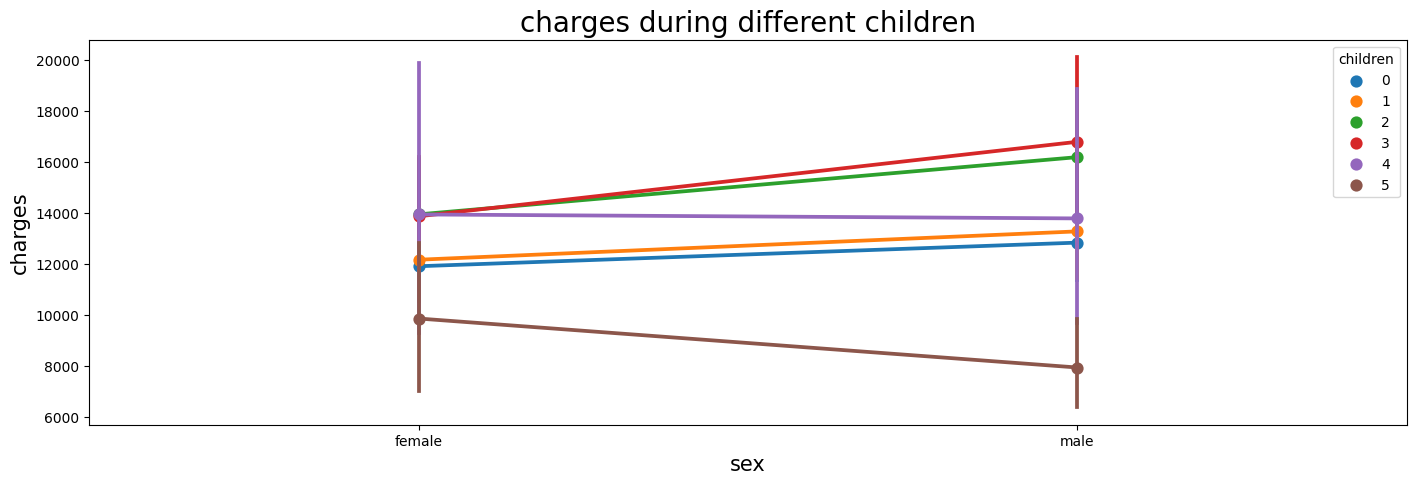

In [94]:
get_plot('sex','children')

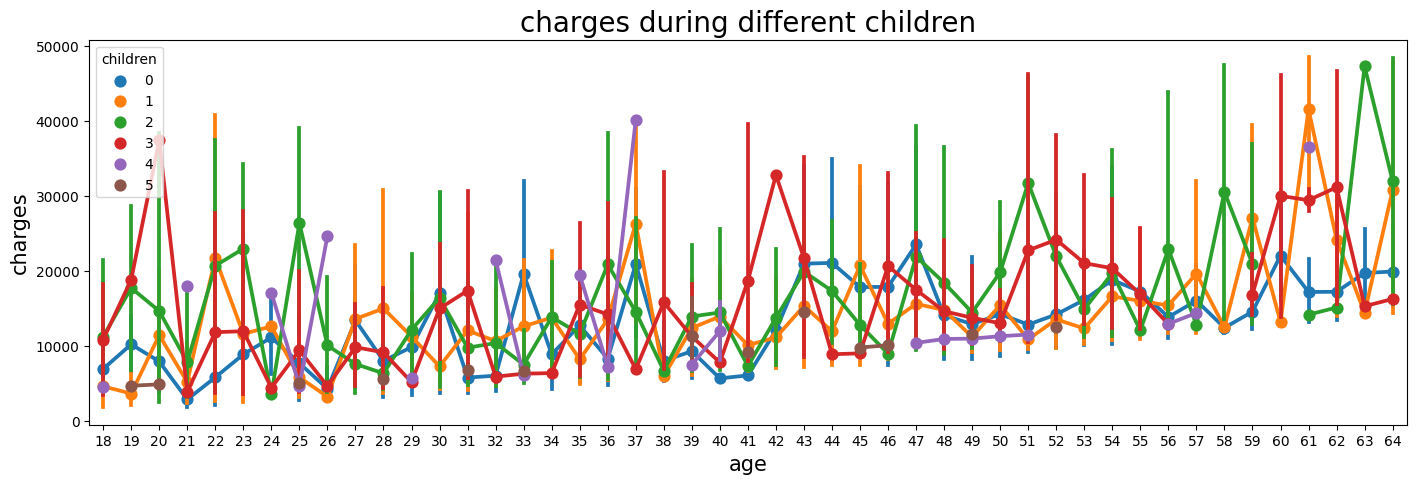

In [95]:
get_plot('age','children')

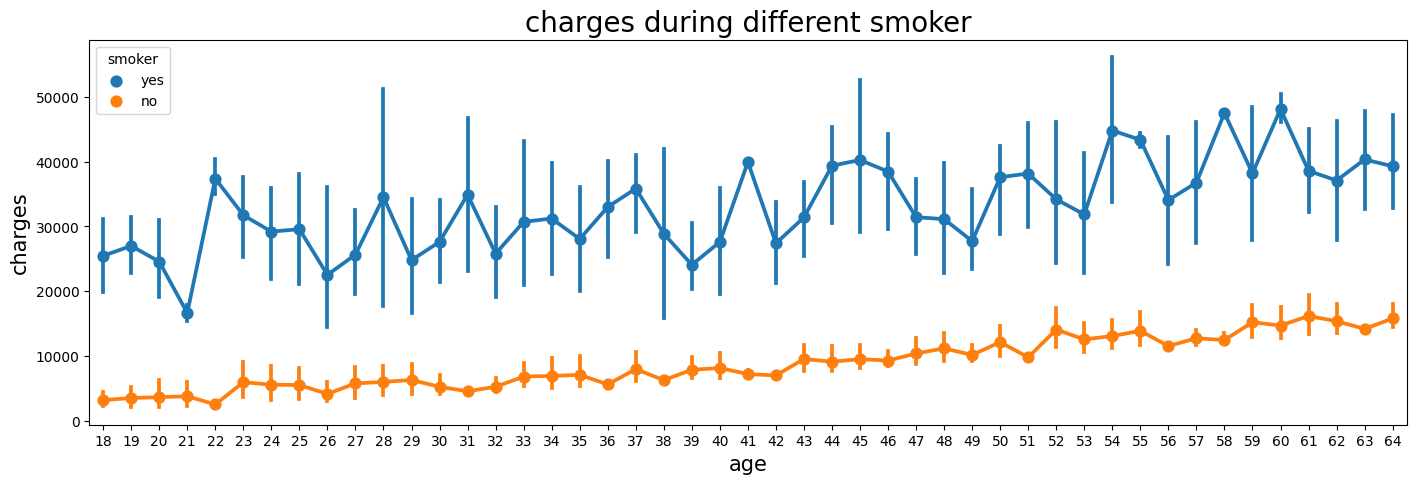

In [96]:
get_plot('age','smoker')

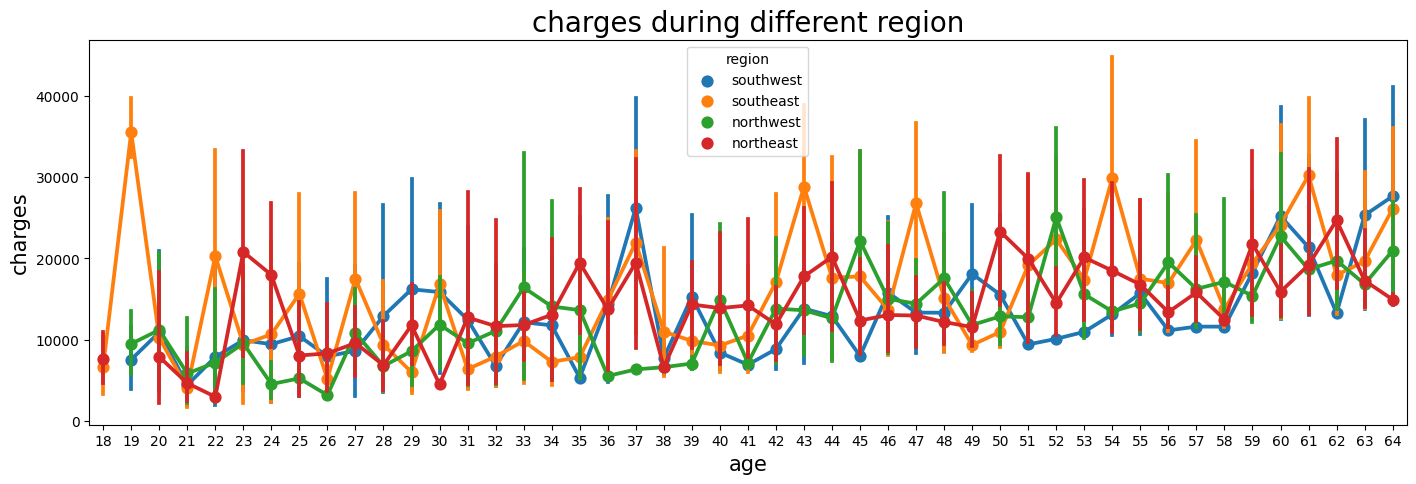

In [97]:
get_plot('age','region')

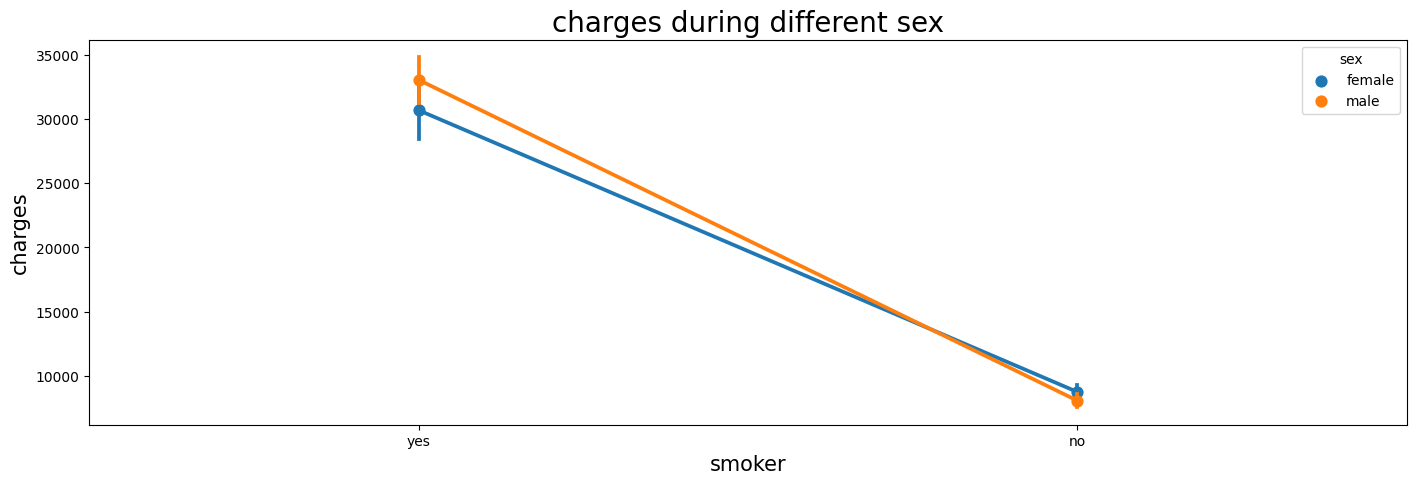

In [98]:
get_plot('smoker','sex')

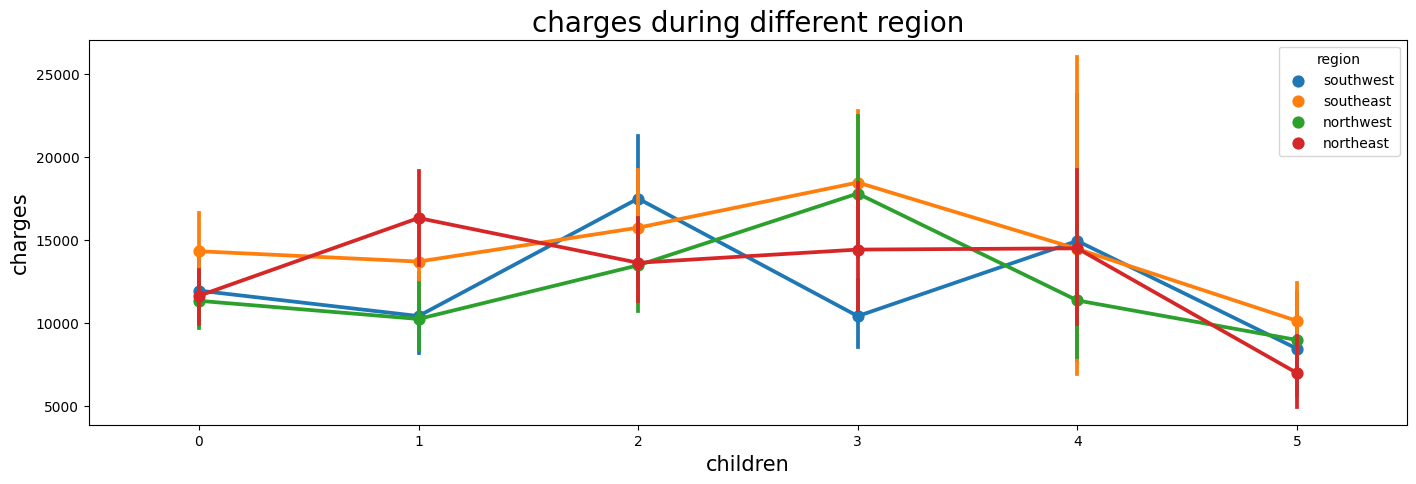

In [99]:
get_plot('children','region')

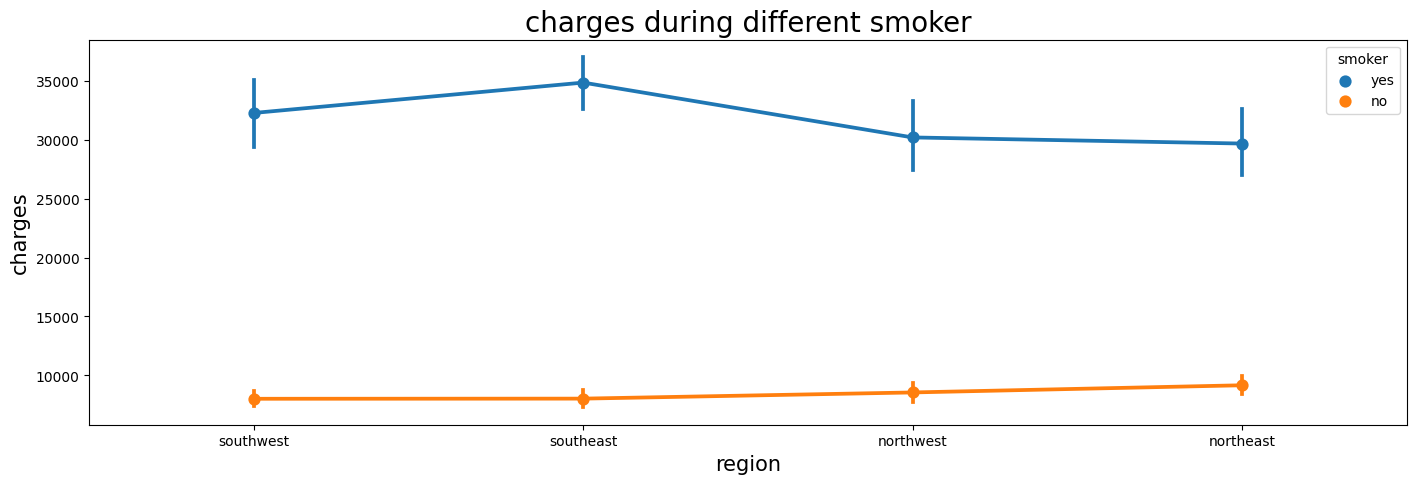

In [100]:
get_plot('region','smoker')

In [101]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [148]:
encoders_nums = {"smoker":{"yes":1,"no":0},
                 "sex":{"male":1,"female":0}}

df = df.replace(encoders_nums)

In [116]:
df['charges'] = np.log(df['charges'])

<ipython-input-149-10c11cdb5608>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['charges']),color="y")


<Axes: xlabel='charges', ylabel='Density'>

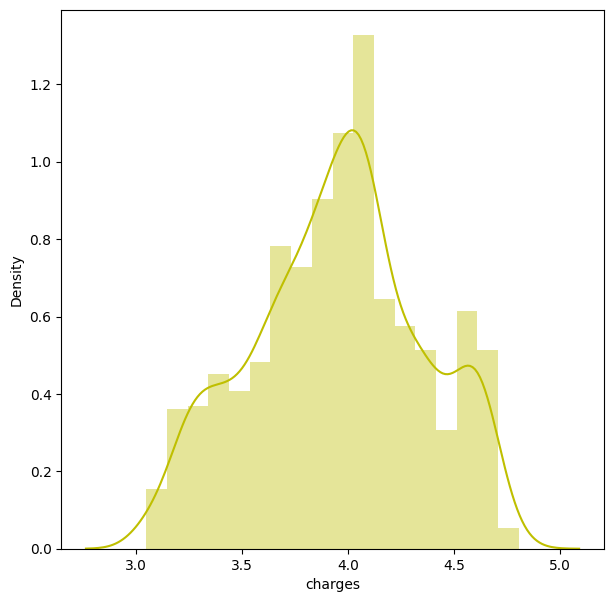

In [149]:
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['charges']),color="y")

In [104]:
numeric_features = df.describe().columns
numeric_features

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

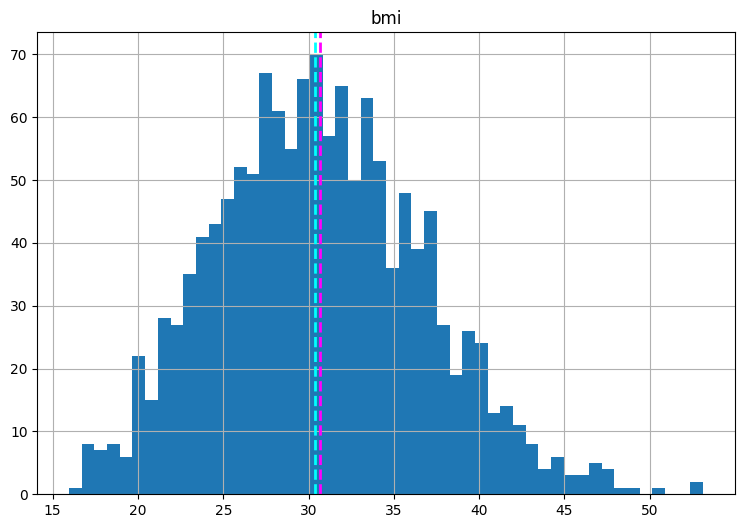

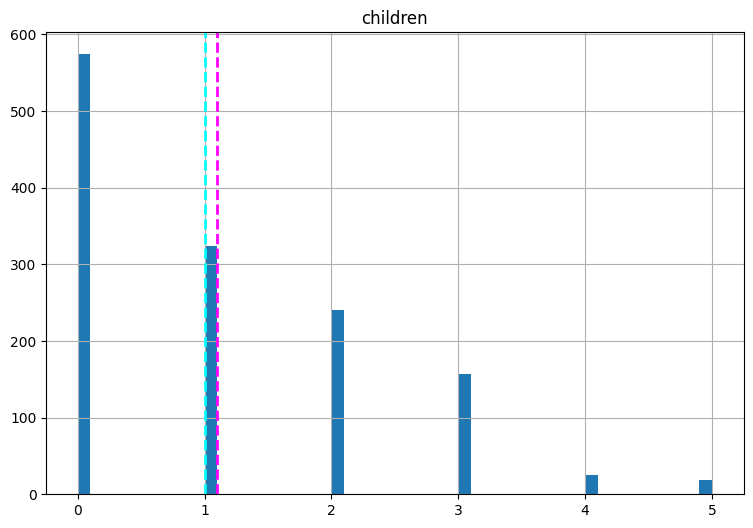

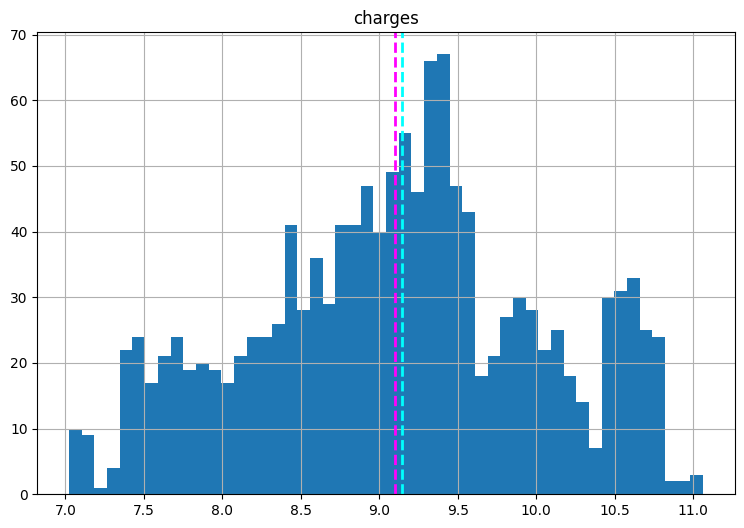

In [105]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

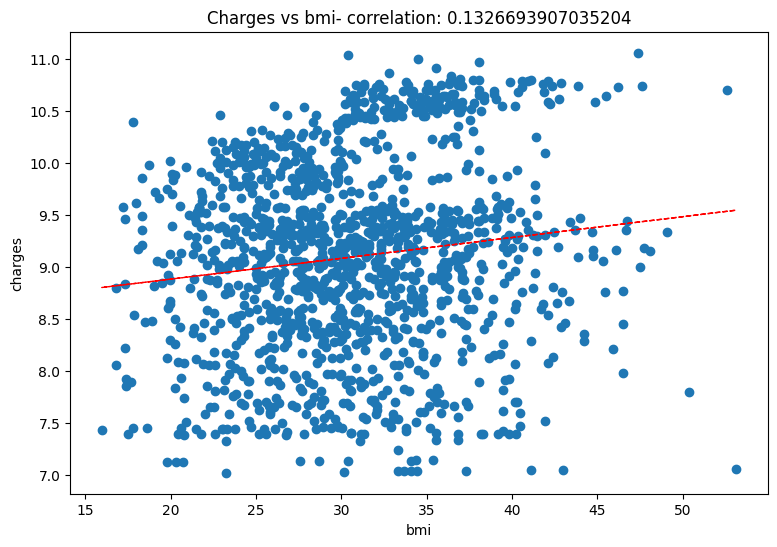

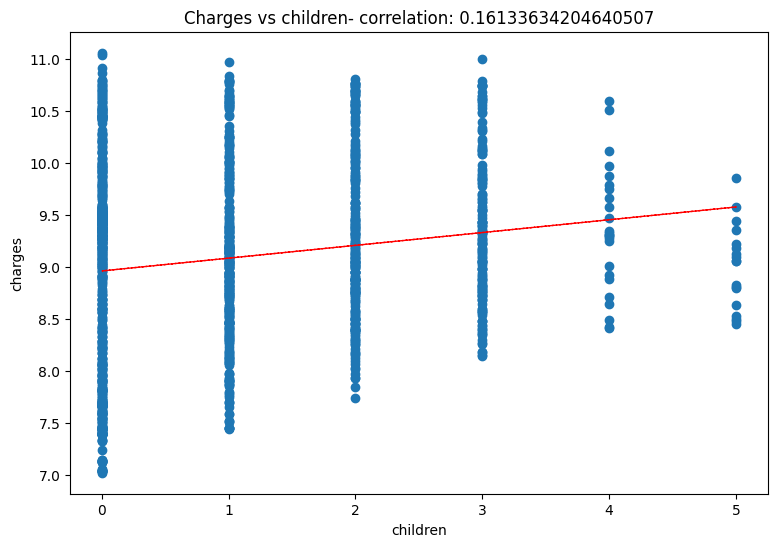

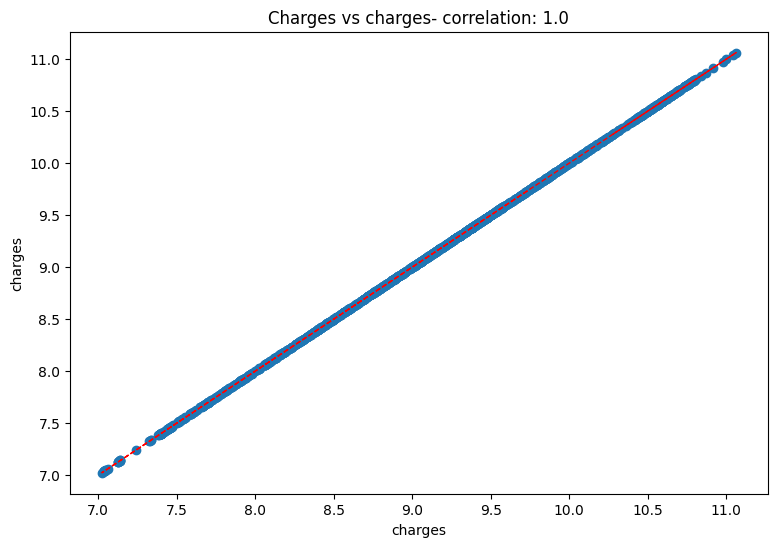

In [106]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['charges']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('charges')
    ax.set_title('Charges vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['charges'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

<ipython-input-107-105eaa61831f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

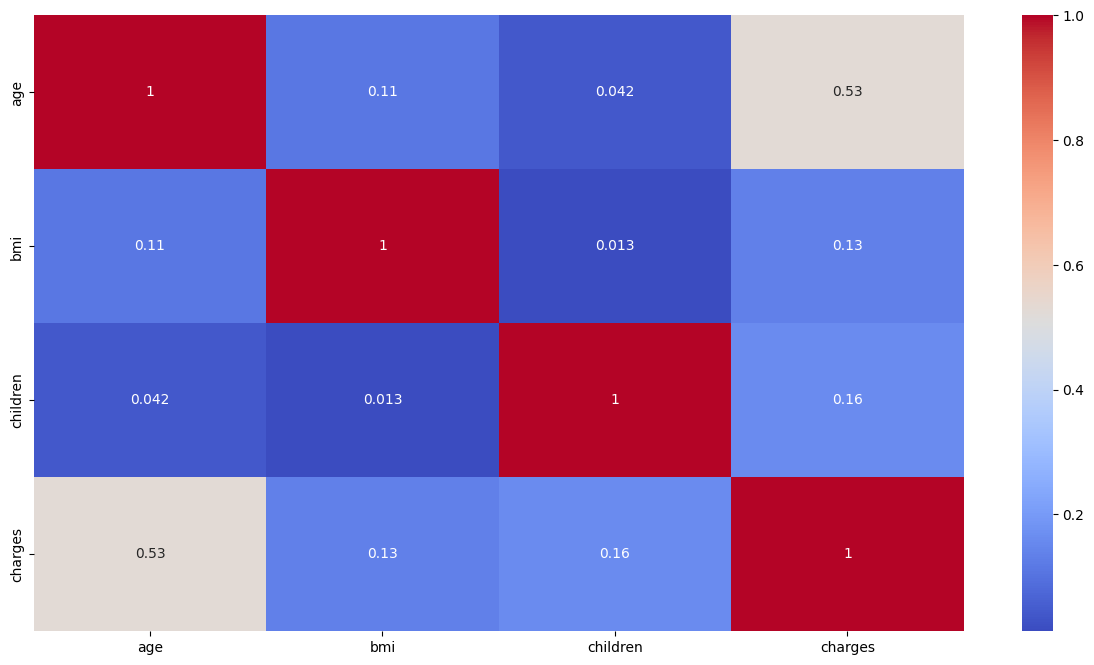

In [107]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [150]:
mapping_dictDay={'southeast':1,'southwest':2,'northeast':3,'northwest':4}

df['region']=df['region'].map(mapping_dictDay)

In [120]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,9.734176,0,0,1
1,18,1,33.770,1,0,7.453302,0,1,0
2,28,1,33.000,3,0,8.400538,0,1,0
3,33,1,22.705,0,0,9.998092,1,0,0
4,32,1,28.880,0,0,8.260197,1,0,0


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [122]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [123]:
df=clean_dataset(df)

<ipython-input-122-19e362bcb334>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)


In [124]:
df.shape

(1338, 9)

In [152]:
Y = df['charges']
X = df.drop(columns='charges', axis=1)

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,Y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(1070, 6)
(268, 6)


In [154]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [155]:
y_pred = reg.predict(X_test)

In [156]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test),(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 31987105.23679421
RMSE : 5655.7143878376855


In [157]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test),(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7989875396812892
Adjusted R2 :  0.7943665635820085
